# Open Problems in Cell Analyis: Quick EDA

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#ffffe6;
       font-size:120%;">
    <p style="padding: 10px;
          color:black;">
Let's take a look at CITEseq inputs first
    </p>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
!pip install --quiet tables

In [3]:
import os
os.makedirs('/kaggle/working/inputs', exist_ok=True)
# Circumvent read-only issues
!cp ../input/open-problems-multimodal/train_cite_inputs.h5 '/kaggle/working/inputs'

In [4]:
with pd.HDFStore('/kaggle/working/inputs/train_cite_inputs.h5') as data:
    shape = data['/train_cite_inputs'].shape
    print(f"There are {shape[0]} cell IDs and {shape[1]} columns (!)")
    selected_columns = data['/train_cite_inputs'].columns[:40]
    # We select only 50 cells for starters
    df = data['/train_cite_inputs'][selected_columns].head(50)
    
df.head()

There are 70988 cell IDs and 22050 columns (!)


gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000179869_ABCA13,ENSG00000238098_ABCA17P,ENSG00000107331_ABCA2,ENSG00000167972_ABCA3,ENSG00000154265_ABCA5,ENSG00000154262_ABCA6,ENSG00000064687_ABCA7,ENSG00000085563_ABCB1,ENSG00000135776_ABCB10,ENSG00000073734_ABCB11
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,4.090185,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,4.039545,0.000000,0.0,0.0,0.0,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.0,0.0,0.000000,0.000000,3.847321,0.0,0.0,0.0,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,3.436846,0.0,0.0,0.0,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [5]:
!pip install --quiet joypy

/opt/conda/lib/python3.7/site-packages/joypy/joyplot.py:288: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  "Consider using a different visualization.".format(val))


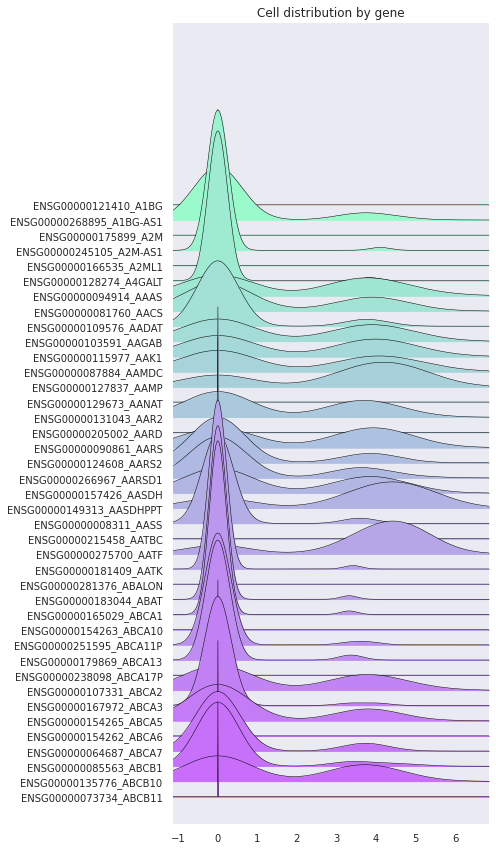

In [6]:
import pandas as pd
import joypy
import numpy as np

def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)

joypy.joyplot(
              df,
    title="Cell distribution by gene",overlap=4,
              colormap=lambda x: color_gradient(x, start=(153/256, 255/256, 204/256),
                                                stop=(204/256, 102/256, 255/256)),
              linecolor='black', linewidth=.5,
             figsize=(7,12),);



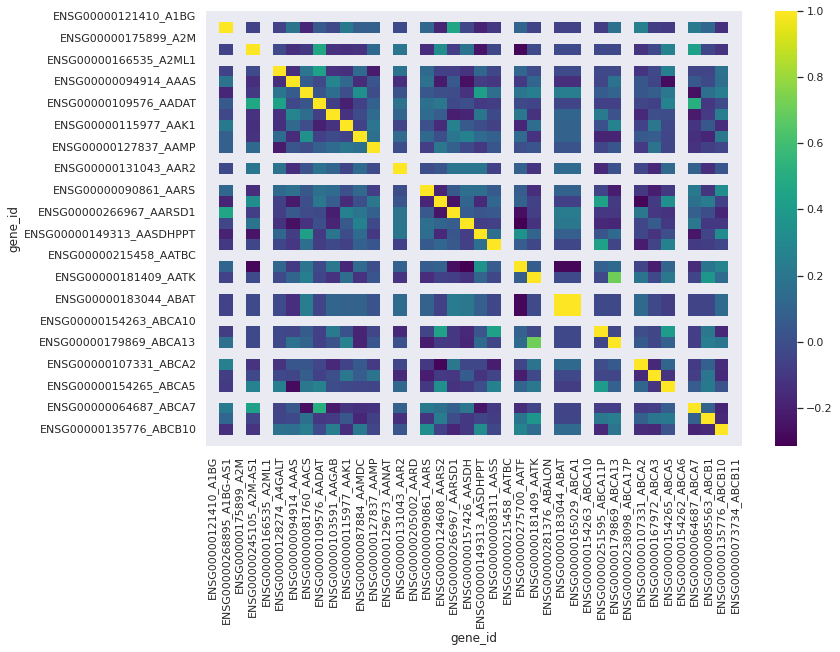

In [7]:
corr = df.corr()
plt.figure(figsize=(12,8));
sns.heatmap(corr, cmap="viridis");

----
<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#ffffe6;
       font-size:120%;">
    <p style="padding: 10px;
          color:black;">
Now we get to the CITEseq targets
    </p>
</div>

In [8]:
os.makedirs('/kaggle/working/labels', exist_ok=True)
!cp ../input/open-problems-multimodal/train_cite_targets.h5 '/kaggle/working/labels'

In [9]:
with pd.HDFStore('/kaggle/working/labels/train_cite_targets.h5') as data:
    shape = data['/train_cite_targets'].shape
    print(f"There are {shape[0]} cell IDs and {shape[1]} columns (!)")
    selected_columns = data['/train_cite_targets'].columns[:40]
    # We select only 50 cells for starters
    df_targets = data['/train_cite_targets'][selected_columns].head(50)

There are 70988 cell IDs and 140 columns (!)


In [10]:
df_targets.head()

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,TIGIT,Mouse-IgG1,Mouse-IgG2a,Mouse-IgG2b,Rat-IgG2b,CD20,CD335,CD31,Podoplanin,CD146
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.716263,0.132499,-0.034390,0.088057,1.009419,0.124132,0.146069,14.598290,0.068552,-0.311110
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,-0.539296,-0.338439,0.495782,1.596701,-0.520776,-0.291943,0.113660,13.131903,-0.399182,-0.680874
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,-0.143044,0.396504,-0.369433,0.307419,-0.400956,0.184605,0.636807,4.339216,0.053062,-0.578057
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,0.324045,0.804947,1.097535,-0.302640,-1.444537,0.122355,1.153387,12.376136,0.247949,-0.471197
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.109150,1.442148,0.124343,-0.058975,0.446378,-1.778288,1.709583,3.545980,1.033542,-1.655415


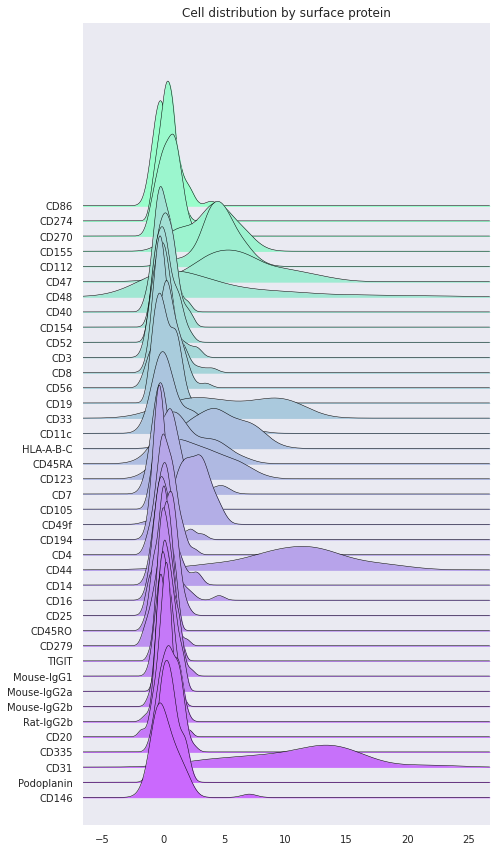

In [11]:
joypy.joyplot(
              df_targets,
    title="Cell distribution by surface protein",overlap=4,
              colormap=lambda x: color_gradient(x, start=(153/256, 255/256, 204/256),
                                                stop=(204/256, 102/256, 255/256)),
              linecolor='black', linewidth=.5,
             figsize=(7,12),);